In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load meta data for sample dataframe, includes the information for 87 sample.
#Link for more info: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE52588
#Link to download file:
# https://ftp.ncbi.nlm.nih.gov/geo/series/GSE52nnn/GSE52588/matrix/GSE52588_series_matrix.txt.gz
meta_df= pd.read_table('GSE52588_series_matrix.txt',skiprows=51,index_col=0)

In [4]:
label=pd.DataFrame(meta_df.loc['!Sample_characteristics_ch1'].iloc[1,:])

In [5]:
label

,!Sample_characteristics_ch1
GSM1272122,disease state: Down syndrome
GSM1272123,disease state: Down syndrome
GSM1272124,disease state: Down syndrome
GSM1272125,disease state: Down syndrome
GSM1272126,disease state: Down syndrome
...,...
GSM1272204,disease state: healthy
GSM1272205,disease state: healthy
GSM1272206,disease state: healthy
GSM1272207,disease state: healthy


In [6]:
#Load sample dataframe, includes the CpGs for 87 sample.
#Link for more info: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE52588
#Link to download file:
# https://ftp.ncbi.nlm.nih.gov/geo/series/GSE52nnn/GSE52588/matrix/GSE52588_series_matrix.txt.gz
df = pd.read_table('GSE52588_series_matrix.txt',skiprows=51+36,index_col=0)


In [7]:
#Load coefficients for 651 CpGs
#Link for more info: https://www.nature.com/articles/s41467-021-21064-z#Sec20 
#Supplementary table 2
#Link to download file:
# https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-021-21064-z/MediaObjects/41467_2021_21064_MOESM6_ESM.xlsx
coef=pd.read_excel('41467_2021_21064_MOESM6_ESM.xlsx', sheet_name='EWAS_autosomes', skiprows=2, index_col='CpG')


In [33]:
#find common CpGs between the coefficient table and the sample table
common_indexes = df.index.intersection(coef.index)
# common_indexes = common_indexes.sort_values(by='Salary')
(common_indexes)

Index(['cg00017931', 'cg00253658', 'cg00270625', 'cg00443981', 'cg00502597',
       'cg00598394', 'cg00621943', 'cg00641679', 'cg00701946', 'cg00718518',
       ...
       'cg26890182', 'cg26895804', 'cg26939946', 'cg26983198', 'cg27003765',
       'cg27131667', 'cg27292710', 'cg27489873', 'cg27496339', 'cg27502912'],
      dtype='object', length=317)

In [9]:
#coefficients for common CpGs
common_coef=coef.loc[common_indexes]['beta_overall']
common_coef=pd.DataFrame(common_coef)
common_coef

,beta_overall
cg00017931,-0.103422
cg00253658,0.305036
cg00270625,0.282725
cg00443981,0.125699
cg00502597,0.058527
...,...
cg27131667,-0.063509
cg27292710,-0.104862
cg27489873,-0.095791
cg27496339,0.184783


In [114]:
n=10
# top_common_coef = common_coef.sort_values(by=abs('beta_overall'), ascending=False)
top_common_coef = common_coef.loc[abs(common_coef['beta_overall']).sort_values(ascending=False).index]
top_common_coef=top_common_coef.head(n)
top_common_coef

,beta_overall
cg03142697,0.395569
cg00994804,0.388409
cg12477880,0.382631
cg19112186,0.368347
cg05156901,0.346582
cg08260245,0.342018
cg10770023,0.331589
cg24363820,0.322013
cg00253658,0.305036
cg06530441,0.284601


In [115]:
common_indexes=top_common_coef.index
common_indexes

Index(['cg03142697', 'cg00994804', 'cg12477880', 'cg19112186', 'cg05156901',
       'cg08260245', 'cg10770023', 'cg24363820', 'cg00253658', 'cg06530441'],
      dtype='object')

In [116]:
common_coef.isna().any().any()

False

In [117]:
#finding common CpGs for samples
sample_df=df.loc[common_indexes]
sample_df

,GSM1272122,GSM1272123,GSM1272124,GSM1272125,GSM1272126,GSM1272127,GSM1272128,GSM1272129,GSM1272130,GSM1272131,...,GSM1272199,GSM1272200,GSM1272201,GSM1272202,GSM1272203,GSM1272204,GSM1272205,GSM1272206,GSM1272207,GSM1272208
cg03142697,0.765006,0.787154,0.646032,0.639016,0.790171,0.775633,0.815492,0.835098,0.696037,0.737756,...,0.368345,0.251749,0.252366,0.116450,0.286302,0.302319,0.167914,0.185161,0.269405,0.141229
cg00994804,0.664598,0.716580,0.606241,0.624763,0.736029,0.726355,0.818188,0.831673,0.589140,0.671840,...,0.444780,0.338847,0.384856,0.086057,0.449115,0.444398,0.271086,0.330266,0.409762,0.146387
cg12477880,0.724622,0.773354,0.643922,0.674983,0.779940,0.762136,0.834774,0.860417,0.662864,0.703031,...,0.471187,0.394377,0.414290,0.114014,0.448230,0.494125,0.274954,0.347954,0.409947,0.160264
cg19112186,0.911562,0.931745,0.851872,0.869113,0.866614,0.977866,0.708291,0.933732,0.838724,0.809842,...,0.514207,0.505370,0.529512,0.578256,0.723978,0.768661,0.772770,0.676360,0.663813,0.626297
cg05156901,0.904015,0.934432,0.883499,0.873492,0.881485,0.964783,0.719453,0.944279,0.847452,0.829536,...,0.502799,0.521211,0.581611,0.573712,0.722836,0.788261,0.889209,0.678049,0.686953,0.654106
cg08260245,0.916254,0.938529,0.833996,0.881218,0.876166,0.977808,0.735315,0.936819,0.829245,0.809094,...,0.575519,0.604291,0.650698,0.628093,0.757067,0.787637,0.795898,0.744509,0.725240,0.699614
cg10770023,0.889095,0.912760,0.795521,0.817598,0.832659,0.968387,0.625509,0.871015,0.774853,0.734084,...,0.407517,0.404748,0.469668,0.434208,0.605713,0.664266,0.740474,0.544450,0.528090,0.517205
cg24363820,0.876972,0.893420,0.774255,0.806791,0.827799,0.928844,0.642502,0.873402,0.766704,0.730850,...,0.450113,0.441821,0.464059,0.515657,0.645421,0.701027,0.653515,0.607382,0.600989,0.591685
cg00253658,0.619556,0.721325,0.600100,0.676745,0.675025,0.708171,0.622399,0.676886,0.838296,0.711664,...,0.603229,0.323533,0.182045,0.244036,0.404024,0.415811,0.131664,0.379444,0.393996,0.273096
cg06530441,0.721494,0.741977,0.652414,0.651062,0.646703,0.706044,0.499428,0.734151,0.597921,0.567442,...,0.309408,0.300484,0.301007,0.302413,0.420915,0.528234,0.308208,0.434331,0.392997,0.369726


In [118]:
sample_df.isna().any().any()

False

In [119]:
#fill NaN in sample_df with the mean of the corresponding CpG over the sample
def fillna_with_row_mean(row):
    row_mean = row.mean()
    return row.fillna(row_mean)

sample_df = sample_df.apply(fillna_with_row_mean, axis=1)

In [120]:
merged_df = pd.merge(sample_df, common_coef, left_index=True, right_index=True)
merged_df

,GSM1272122,GSM1272123,GSM1272124,GSM1272125,GSM1272126,GSM1272127,GSM1272128,GSM1272129,GSM1272130,GSM1272131,...,GSM1272200,GSM1272201,GSM1272202,GSM1272203,GSM1272204,GSM1272205,GSM1272206,GSM1272207,GSM1272208,beta_overall
cg03142697,0.765006,0.787154,0.646032,0.639016,0.790171,0.775633,0.815492,0.835098,0.696037,0.737756,...,0.251749,0.252366,0.116450,0.286302,0.302319,0.167914,0.185161,0.269405,0.141229,0.395569
cg00994804,0.664598,0.716580,0.606241,0.624763,0.736029,0.726355,0.818188,0.831673,0.589140,0.671840,...,0.338847,0.384856,0.086057,0.449115,0.444398,0.271086,0.330266,0.409762,0.146387,0.388409
cg12477880,0.724622,0.773354,0.643922,0.674983,0.779940,0.762136,0.834774,0.860417,0.662864,0.703031,...,0.394377,0.414290,0.114014,0.448230,0.494125,0.274954,0.347954,0.409947,0.160264,0.382631
cg19112186,0.911562,0.931745,0.851872,0.869113,0.866614,0.977866,0.708291,0.933732,0.838724,0.809842,...,0.505370,0.529512,0.578256,0.723978,0.768661,0.772770,0.676360,0.663813,0.626297,0.368347
cg05156901,0.904015,0.934432,0.883499,0.873492,0.881485,0.964783,0.719453,0.944279,0.847452,0.829536,...,0.521211,0.581611,0.573712,0.722836,0.788261,0.889209,0.678049,0.686953,0.654106,0.346582
cg08260245,0.916254,0.938529,0.833996,0.881218,0.876166,0.977808,0.735315,0.936819,0.829245,0.809094,...,0.604291,0.650698,0.628093,0.757067,0.787637,0.795898,0.744509,0.725240,0.699614,0.342018
cg10770023,0.889095,0.912760,0.795521,0.817598,0.832659,0.968387,0.625509,0.871015,0.774853,0.734084,...,0.404748,0.469668,0.434208,0.605713,0.664266,0.740474,0.544450,0.528090,0.517205,0.331589
cg24363820,0.876972,0.893420,0.774255,0.806791,0.827799,0.928844,0.642502,0.873402,0.766704,0.730850,...,0.441821,0.464059,0.515657,0.645421,0.701027,0.653515,0.607382,0.600989,0.591685,0.322013
cg00253658,0.619556,0.721325,0.600100,0.676745,0.675025,0.708171,0.622399,0.676886,0.838296,0.711664,...,0.323533,0.182045,0.244036,0.404024,0.415811,0.131664,0.379444,0.393996,0.273096,0.305036
cg06530441,0.721494,0.741977,0.652414,0.651062,0.646703,0.706044,0.499428,0.734151,0.597921,0.567442,...,0.300484,0.301007,0.302413,0.420915,0.528234,0.308208,0.434331,0.392997,0.369726,0.284601


In [121]:
#Multiply each CPG methylation value with the corresponding coefficient
result_df = merged_df.iloc[:, :-1] * merged_df['beta_overall'].values.reshape(-1, 1)
result_df

,GSM1272122,GSM1272123,GSM1272124,GSM1272125,GSM1272126,GSM1272127,GSM1272128,GSM1272129,GSM1272130,GSM1272131,...,GSM1272199,GSM1272200,GSM1272201,GSM1272202,GSM1272203,GSM1272204,GSM1272205,GSM1272206,GSM1272207,GSM1272208
cg03142697,0.302612,0.311373,0.255550,0.252775,0.312567,0.306816,0.322583,0.330339,0.275330,0.291833,...,0.145706,0.099584,0.099828,0.046064,0.113252,0.119588,0.066421,0.073244,0.106568,0.055866
cg00994804,0.258136,0.278326,0.235470,0.242663,0.285880,0.282123,0.317792,0.323029,0.228827,0.260949,...,0.172756,0.131611,0.149482,0.033425,0.174440,0.172608,0.105292,0.128278,0.159155,0.056858
cg12477880,0.277263,0.295909,0.246384,0.258269,0.298429,0.291617,0.319410,0.329222,0.253632,0.269001,...,0.180291,0.150901,0.158520,0.043625,0.171506,0.189067,0.105206,0.133138,0.156858,0.061322
cg19112186,0.335772,0.343206,0.313785,0.320135,0.319215,0.360194,0.260897,0.343938,0.308942,0.298303,...,0.189407,0.186152,0.195045,0.212999,0.266675,0.283134,0.284648,0.249135,0.244514,0.230695
cg05156901,0.313316,0.323858,0.306205,0.302737,0.305507,0.334377,0.249350,0.327270,0.293712,0.287503,...,0.174261,0.180643,0.201576,0.198839,0.250522,0.273198,0.308184,0.235000,0.238086,0.226702
cg08260245,0.313376,0.320994,0.285242,0.301393,0.299665,0.334428,0.251491,0.320409,0.283617,0.276725,...,0.196838,0.206678,0.222551,0.214819,0.258931,0.269386,0.272212,0.254635,0.248045,0.239281
cg10770023,0.294814,0.302661,0.263786,0.271107,0.276101,0.321107,0.207412,0.288819,0.256933,0.243414,...,0.135128,0.134210,0.155737,0.143979,0.200848,0.220263,0.245533,0.180534,0.175109,0.171500
cg24363820,0.282396,0.287692,0.249320,0.259797,0.266562,0.299100,0.206894,0.281246,0.246888,0.235343,...,0.144942,0.142272,0.149433,0.166048,0.207834,0.225740,0.210440,0.195585,0.193526,0.190530
cg00253658,0.188987,0.220030,0.183052,0.206431,0.205907,0.216018,0.189854,0.206475,0.255710,0.217083,...,0.184006,0.098689,0.055530,0.074440,0.123242,0.126837,0.040162,0.115744,0.120183,0.083304
cg06530441,0.205338,0.211167,0.185678,0.185293,0.184052,0.200941,0.142138,0.208940,0.170169,0.161495,...,0.088058,0.085518,0.085667,0.086067,0.119793,0.150336,0.087716,0.123611,0.111847,0.105224


In [122]:
regression_results=pd.DataFrame(result_df.sum())
regression_results = pd.merge(regression_results, label, left_index=True, right_index=True)
regression_results.rename(columns={0: 'Epigenetic Score'}, inplace=True)
regression_results.rename(columns={'!Sample_characteristics_ch1': 'Disease State'}, inplace=True)
regression_results['Disease State'] = regression_results['Disease State'].str.replace('disease state: ', '')
regression_results['Disease State'] = regression_results['Disease State'].str.title()
regression_results['Disease State'] = regression_results['Disease State'].str.title()

In [123]:
regression_results

,Epigenetic Score,Disease State
GSM1272122,2.772008,Down Syndrome
GSM1272123,2.895217,Down Syndrome
GSM1272124,2.524472,Down Syndrome
GSM1272125,2.600600,Down Syndrome
GSM1272126,2.753884,Down Syndrome
...,...,...
GSM1272204,2.030157,Healthy
GSM1272205,1.725815,Healthy
GSM1272206,1.688904,Healthy
GSM1272207,1.753892,Healthy


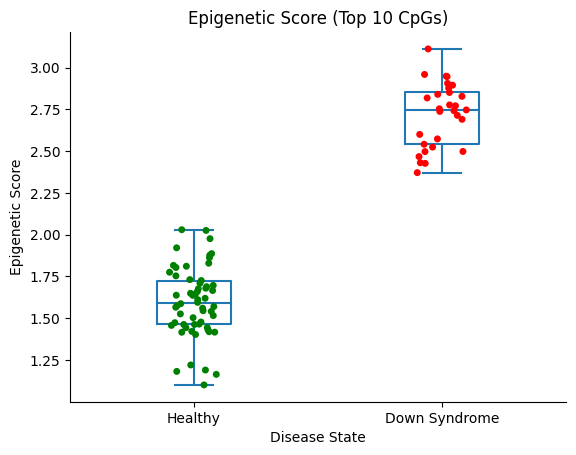

In [126]:
category_order = ['Healthy', 'Down Syndrome']
ax=sns.boxplot(x='Disease State', y='Epigenetic Score', data=regression_results, width=0.3,  fill=None, order=category_order)
sns.stripplot(x='Disease State', y='Epigenetic Score', data=regression_results, jitter=True,palette={'Healthy': 'green', 'Down Syndrome': 'red'}, order=category_order)
if n==317:
    ax.set_title('Epigenetic Score (All CpGs)')
else:
    ax.set_title('Epigenetic Score (Top '+str(n)+' CpGs)')
sns.despine()
fig = plt.gcf()
filename='epigenetic_score_top_'+str(n)+'_cpgs.png'
fig.savefig(filename)
